In [1]:
# ==== Training and Validation dataset ====
import pandas as pd
import numpy as np
import os

# ==== CONFIGURATION ====
WINDOW_SIZE = 10  # number of timesteps per sequence
file_path = r"D:\.disk\Pattern recognition dataset\InteractionEvents-Dataset.csv"  
save_dir = r"D:\.disk\Pattern recognition dataset\prepared-updated4_data"  # Directory to save processed output
os.makedirs(save_dir, exist_ok=True)

# ==== LOAD DATA ====
df = pd.read_csv(file_path)

# ==== DEFINE BEHAVIORAL FEATURES ONLY ====
FEATURE_COLUMNS = [
    'RelativeTime', 'Duration','InteractionInterval',
    'HeadPosX', 'HeadPosY', 'HeadPosZ',
    'HeadRotX', 'HeadRotY', 'HeadRotZ', 'HeadRotW',
    'GazeDirX', 'GazeDirY', 'GazeDirZ',
    'DistanceToObject', 'HeadVelocity',
    'LeftHandVelocity', 'RightHandVelocity',
    'LeftHandPosX', 'LeftHandPosY', 'LeftHandPosZ',
    'LeftHandRotX', 'LeftHandRotY', 'LeftHandRotZ', 'LeftHandRotW',
    'RightHandPosX', 'RightHandPosY', 'RightHandPosZ',
    'RightHandRotX', 'RightHandRotY', 'RightHandRotZ', 'RightHandRotW'
]

# ==== CLEANING ====
# Drop rows with missing feature or label values
df_clean = df.dropna(subset=FEATURE_COLUMNS + ['UserID', 'UserName'])

# ==== BUILD SEQUENCES ====
X, y_userid, y_username = [], [], []

for _, user_data in df_clean.groupby('UserID'):
    user_data = user_data.sort_values('StepIndex')
    feature_array = user_data[FEATURE_COLUMNS].values
    userid = user_data['UserID'].iloc[0]
    username = user_data['UserName'].iloc[0]
    
    for i in range(len(user_data) - WINDOW_SIZE + 1):
        seq = feature_array[i:i + WINDOW_SIZE]
        X.append(seq)
        y_userid.append(userid)
        y_username.append(username)

# ==== CONVERT TO NUMPY ARRAYS ====
X = np.array(X)
y_userid = np.array(y_userid)
y_username = np.array(y_username)

# ==== SAVE TO .NPY ====
np.save(os.path.join(save_dir, "X_sequences.npy"), X)
np.save(os.path.join(save_dir, "y_userid.npy"), y_userid)
np.save(os.path.join(save_dir, "y_username.npy"), y_username)

# ==== SAVE LABELS TO CSV ====
pd.DataFrame({'UserID': y_userid}).to_csv(os.path.join(save_dir, "y_userid.csv"), index=False)
pd.DataFrame({'UserName': y_username}).to_csv(os.path.join(save_dir, "y_username.csv"), index=False)

# ==== FLATTEN SEQUENCES FOR CSV EXPORT ====
X_flattened = X.reshape(X.shape[0], -1)
num_timesteps = X.shape[1]
num_features = X.shape[2]

# Create readable column names like t0_GazeDirX
csv_columns = [
    f"t{t}_{feature}" for t in range(num_timesteps) for feature in FEATURE_COLUMNS
]

# Save flattened sequences as CSV
df_X_flat = pd.DataFrame(X_flattened, columns=csv_columns)
df_X_flat.to_csv(os.path.join(save_dir, "X_sequences_flat.csv"), index=False)

# ==== OUTPUT SUMMARY ====
print("✅ Data preparation complete.")
print(f"X shape (LSTM input): {X.shape}")
print(f"UserID labels shape: {y_userid.shape}")
print(f"UserName labels shape: {y_username.shape}")
print(f"Flattened CSV shape: {df_X_flat.shape}")
print(f"Files saved in: {os.path.abspath(save_dir)}")

✅ Data preparation complete.
X shape (LSTM input): (9535, 10, 31)
UserID labels shape: (9535,)
UserName labels shape: (9535,)
Flattened CSV shape: (9535, 310)
Files saved in: D:\.disk\Pattern recognition dataset\prepared-updated4_data


In [2]:
# ==== Unseen dataset ====
import pandas as pd
import numpy as np
import os

# ==== CONFIGURATION ====
WINDOW_SIZE = 10  # number of timesteps per sequence
file_path = r"D:\.disk\Pattern recognition dataset\InteractionEvents-Prediction-UnseenData-Dataset.csv"  
save_dir = r"D:\.disk\Pattern recognition dataset\prepared_data_Prediction7"  # Directory to save processed output
os.makedirs(save_dir, exist_ok=True)

# ==== LOAD DATA ====
df = pd.read_csv(file_path)

# ==== DEFINE BEHAVIORAL FEATURES ONLY ====
FEATURE_COLUMNS = [
    'RelativeTime', 'Duration','InteractionInterval',
    'HeadPosX', 'HeadPosY', 'HeadPosZ',
    'HeadRotX', 'HeadRotY', 'HeadRotZ', 'HeadRotW',
    'GazeDirX', 'GazeDirY', 'GazeDirZ',
    'DistanceToObject', 'HeadVelocity',
    'LeftHandVelocity', 'RightHandVelocity',
    'LeftHandPosX', 'LeftHandPosY', 'LeftHandPosZ',
    'LeftHandRotX', 'LeftHandRotY', 'LeftHandRotZ', 'LeftHandRotW',
    'RightHandPosX', 'RightHandPosY', 'RightHandPosZ',
    'RightHandRotX', 'RightHandRotY', 'RightHandRotZ', 'RightHandRotW'
]

# ==== CLEANING ====
# Drop rows with missing feature or label values
df_clean = df.dropna(subset=FEATURE_COLUMNS + ['UserID', 'UserName'])

# ==== BUILD SEQUENCES ====
X, y_userid, y_username = [], [], []

for _, user_data in df_clean.groupby('UserID'):
    user_data = user_data.sort_values('StepIndex')
    feature_array = user_data[FEATURE_COLUMNS].values
    userid = user_data['UserID'].iloc[0]
    username = user_data['UserName'].iloc[0]
    
    for i in range(len(user_data) - WINDOW_SIZE + 1):
        seq = feature_array[i:i + WINDOW_SIZE]
        X.append(seq)
        y_userid.append(userid)
        y_username.append(username)

# ==== CONVERT TO NUMPY ARRAYS ====
X = np.array(X)
y_userid = np.array(y_userid)
y_username = np.array(y_username)

# ==== SAVE TO .NPY ====
np.save(os.path.join(save_dir, "X_sequences.npy"), X)
np.save(os.path.join(save_dir, "y_userid.npy"), y_userid)
np.save(os.path.join(save_dir, "y_username.npy"), y_username)

# ==== SAVE LABELS TO CSV ====
pd.DataFrame({'UserID': y_userid}).to_csv(os.path.join(save_dir, "y_userid.csv"), index=False)
pd.DataFrame({'UserName': y_username}).to_csv(os.path.join(save_dir, "y_username.csv"), index=False)

# ==== FLATTEN SEQUENCES FOR CSV EXPORT ====
X_flattened = X.reshape(X.shape[0], -1)
num_timesteps = X.shape[1]
num_features = X.shape[2]

# Create readable column names like t0_GazeDirX
csv_columns = [
    f"t{t}_{feature}" for t in range(num_timesteps) for feature in FEATURE_COLUMNS
]

# Save flattened sequences as CSV
df_X_flat = pd.DataFrame(X_flattened, columns=csv_columns)
df_X_flat.to_csv(os.path.join(save_dir, "X_sequences_flat.csv"), index=False)

# ==== OUTPUT SUMMARY ====
print("✅ Data preparation complete.")
print(f"X shape (LSTM input): {X.shape}")
print(f"UserID labels shape: {y_userid.shape}")
print(f"UserName labels shape: {y_username.shape}")
print(f"Flattened CSV shape: {df_X_flat.shape}")
print(f"Files saved in: {os.path.abspath(save_dir)}")

✅ Data preparation complete.
X shape (LSTM input): (1920, 10, 31)
UserID labels shape: (1920,)
UserName labels shape: (1920,)
Flattened CSV shape: (1920, 310)
Files saved in: D:\.disk\Pattern recognition dataset\prepared_data_Prediction7


In [2]:
pip install torchinfo

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


Epoch 1/100 | Train Loss: 2.2387 | Train Acc: 0.4156 | Val Loss: 1.0591 | Val Acc: 0.7095
Epoch 2/100 | Train Loss: 0.7497 | Train Acc: 0.7961 | Val Loss: 0.5641 | Val Acc: 0.8401
Epoch 3/100 | Train Loss: 0.3658 | Train Acc: 0.9053 | Val Loss: 0.2870 | Val Acc: 0.9360
Epoch 4/100 | Train Loss: 0.2074 | Train Acc: 0.9503 | Val Loss: 0.2393 | Val Acc: 0.9324
Epoch 5/100 | Train Loss: 0.1463 | Train Acc: 0.9641 | Val Loss: 0.1407 | Val Acc: 0.9591
Epoch 6/100 | Train Loss: 0.0979 | Train Acc: 0.9784 | Val Loss: 0.1134 | Val Acc: 0.9717
Epoch 7/100 | Train Loss: 0.0669 | Train Acc: 0.9862 | Val Loss: 0.0892 | Val Acc: 0.9785
Epoch 8/100 | Train Loss: 0.0604 | Train Acc: 0.9869 | Val Loss: 0.0926 | Val Acc: 0.9795
Epoch 9/100 | Train Loss: 0.0471 | Train Acc: 0.9891 | Val Loss: 0.1068 | Val Acc: 0.9691
Epoch 10/100 | Train Loss: 0.0479 | Train Acc: 0.9902 | Val Loss: 0.0687 | Val Acc: 0.9843
Epoch 11/100 | Train Loss: 0.0190 | Train Acc: 0.9972 | Val Loss: 0.0624 | Val Acc: 0.9843
Epoch 12

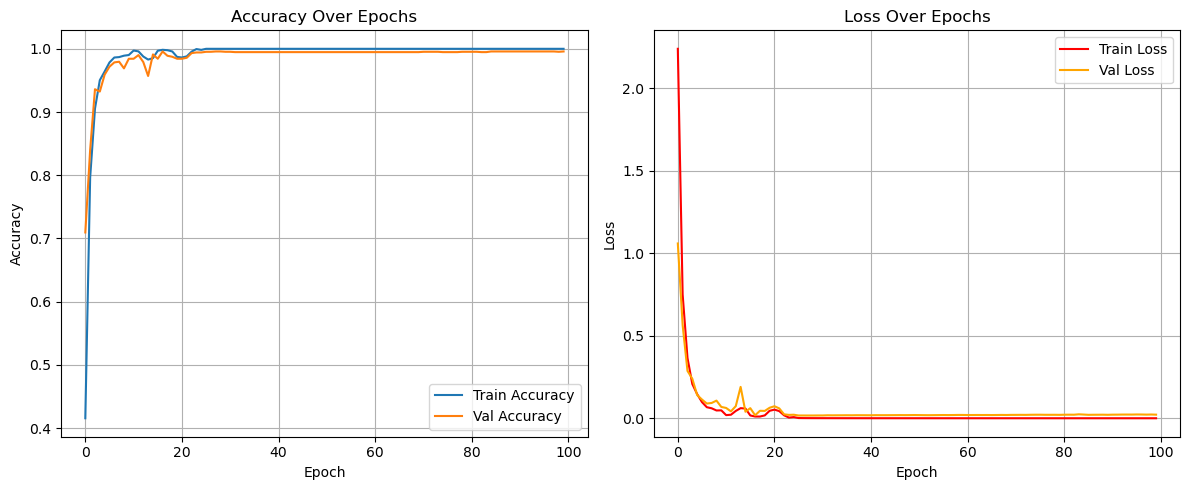

✅ Model, scaler, and label encoder saved successfully.


In [7]:
'This saves trained data'

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from torchinfo import summary

# ==== LOAD AND NORMALIZE DATA ====
X = np.load(r"D:\.disk\Pattern recognition dataset\prepared-updated5_data\X_sequences.npy")
y = np.load(r"D:\.disk\Pattern recognition dataset\prepared-updated5_data\y_userid.npy")

samples, timesteps, features = X.shape
X_reshaped = X.reshape(-1, features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X = X_scaled.reshape(samples, timesteps, features)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

# ==== DEEPER LSTM MODEL ====
class DeepLSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):  # ✅ double underscores
        super().__init__()  # ✅ double underscores
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])

input_size = features
hidden_size = 256
num_classes = len(np.unique(y_encoded))
model = DeepLSTMClassifier(input_size, hidden_size, num_classes)
summary(model, input_size=(64, timesteps, features))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ==== TRAINING ====
EPOCHS = 100
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for xb, yb in train_loader:
        preds = model(xb)
        loss = criterion(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (preds.argmax(dim=1) == yb).sum().item()
        total += yb.size(0)

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            val_loss += criterion(preds, yb).item()
            val_correct += (preds.argmax(dim=1) == yb).sum().item()
            val_total += yb.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_correct / val_total)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | "
          f"Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f}")



# ==== PLOT TRAINING RESULTS ====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_losses, label="Train Loss", color='red')
plt.plot(val_losses, label="Val Loss", color='orange')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ==== SAVE MODEL, SCALER, ENCODER ====
torch.save(model.state_dict(), r"D:\.disk\Pattern recognition dataset\lstm_user_classifier_Updated.pth")
joblib.dump(scaler, r"D:\.disk\Pattern recognition dataset\feature_scaler_updated.pkl")

joblib.dump(label_encoder, r"D:\.disk\Pattern recognition dataset\label_encoder_updated.pkl")
print("✅ Model, scaler, and label encoder saved successfully.")

📊 Plot saved to: D:\.disk\Pattern recognition dataset\user_accuracy_sample_distribution.pdf


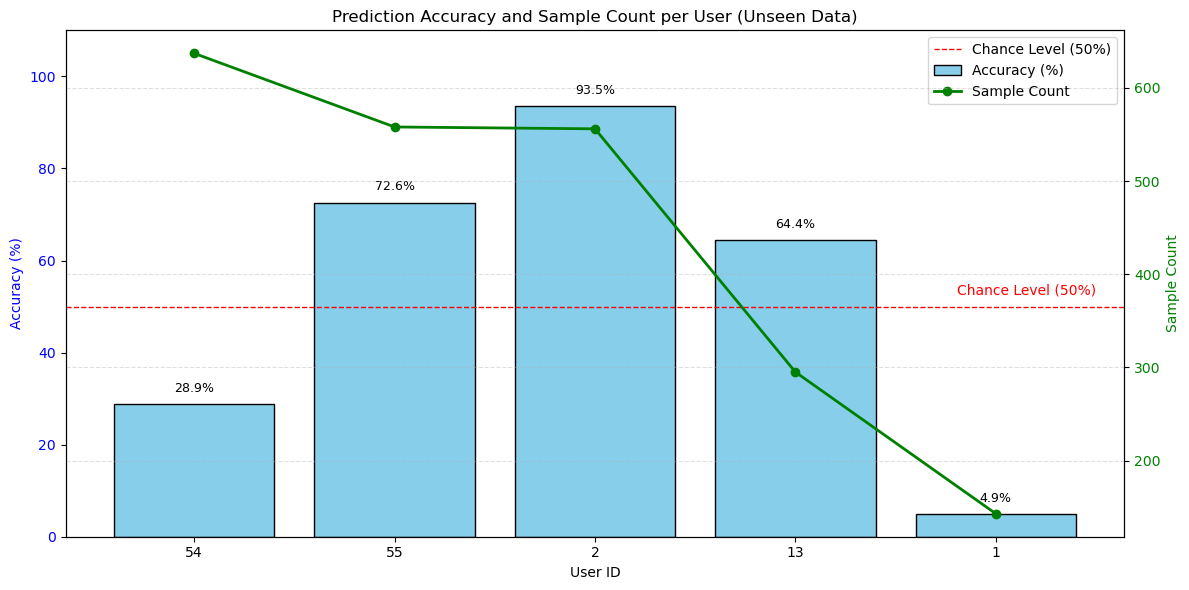

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# ==== LOAD TRUE & PREDICTED USER IDs ====
df = pd.read_csv(r"D:\.disk\Pattern recognition dataset\prepared_data_Prediction7\predictions2_with_true_ids.csv")
true_user_ids = df["TrueUserID"].astype(str).tolist()
predicted_user_ids = df["PredictedUserID"].astype(str).tolist()

# ==== COUNT CORRECT & INCORRECT PER USER ====
correct_counts = Counter()
incorrect_counts = Counter()

for true_id, pred_id in zip(true_user_ids, predicted_user_ids):
    if true_id == pred_id:
        correct_counts[true_id] += 1
    else:
        incorrect_counts[true_id] += 1

# ==== COLLECT USER STATS ====
user_ids = sorted(set(true_user_ids))
user_stats = []

for uid in user_ids:
    correct = correct_counts.get(uid, 0)
    incorrect = incorrect_counts.get(uid, 0)
    total = correct + incorrect
    accuracy = (correct / total) * 100 if total > 0 else 0
    user_stats.append((uid, accuracy, total))

# ==== SORT USERS BY SAMPLE COUNT (DESCENDING) ====
user_stats.sort(key=lambda x: x[2], reverse=True)
uids, accuracies, sample_counts = zip(*user_stats)

# ==== PLOT ====
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for accuracy
bar1 = ax1.bar(uids, accuracies, color='skyblue', edgecolor='black', label="Accuracy (%)")
ax1.set_xlabel("User ID")
ax1.set_ylabel("Accuracy (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 110)
ax1.set_title("Prediction Accuracy and Sample Count per User (Unseen Data)")

# Plot and annotate chance level (50%)
chance_line = ax1.axhline(50, color='red', linestyle='--', linewidth=1, label="Chance Level (50%)")
ax1.text(len(uids)-0.5, 52, 'Chance Level (50%)', color='red', fontsize=10, ha='right', va='bottom')

# Annotate accuracy values on bars
for bar in bar1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Secondary axis for number of samples
ax2 = ax1.twinx()
line2 = ax2.plot(uids, sample_counts, color='green', marker='o', linewidth=2, label="Sample Count")
ax2.set_ylabel("Sample Count", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.4)

plot_path = r"D:\.disk\Pattern recognition dataset\user_accuracy_sample_distribution.pdf"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"📊 Plot saved to: {plot_path}")
plt.show()

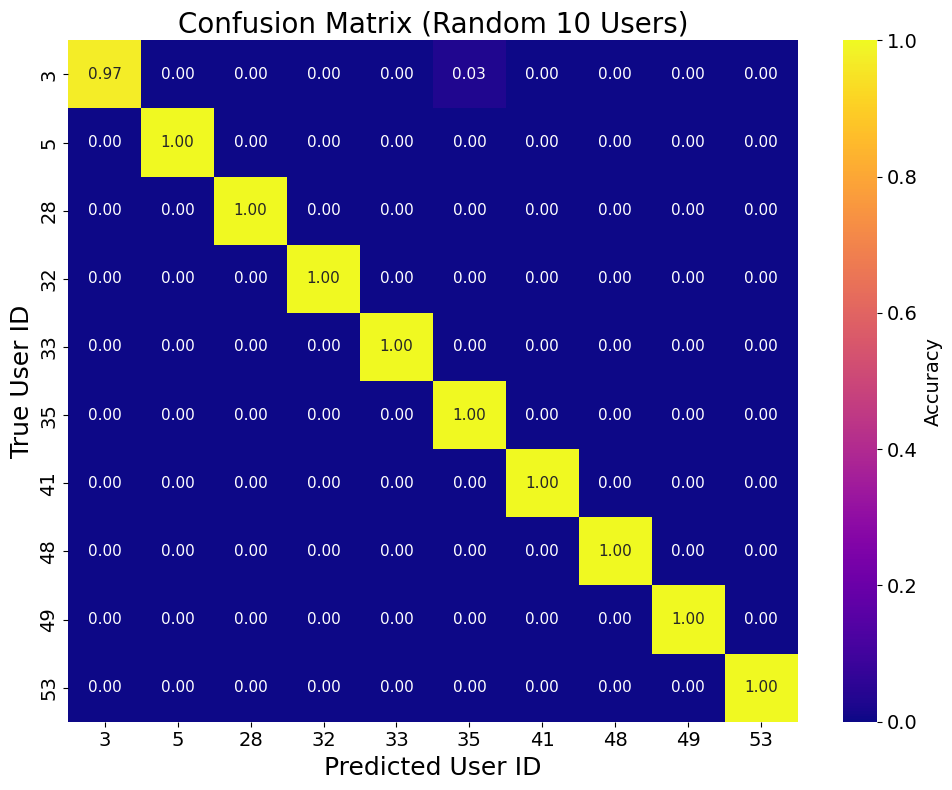

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Load your CSV file
df = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\validation_predictions.csv")

# Extract labels
true_labels = df['TrueUserID']
predicted_labels = df['PredictedUserID']

# Identify users with at least one misclassification
mismatch_users = df[df['TrueUserID'] != df['PredictedUserID']]['TrueUserID'].unique()

# Identify all users
all_users = true_labels.unique()

# Sample 1 mismatched user (if available)
np.random.seed()  
if len(mismatch_users) > 0:
    selected_mismatch_user = np.random.choice(mismatch_users, size=1, replace=False)
else:
    raise ValueError("No users with misclassifications found in the dataset.")

# Sample 9 other users (excluding the selected mismatch user to avoid duplicates)
remaining_users = [user for user in all_users if user not in selected_mismatch_user]
random_other_users = np.random.choice(remaining_users, size=9, replace=False)

# Combine the mismatch user with the others
random_users = np.concatenate([selected_mismatch_user, random_other_users])
random_user_ids = sorted(random_users)

# Filter data for selected users (allow any predicted labels)
filtered_df = df[df['TrueUserID'].isin(random_users)]

# Prepare true and predicted labels for confusion matrix
true_labels_filtered = filtered_df['TrueUserID']
predicted_labels_filtered = filtered_df['PredictedUserID']

# Compute normalized confusion matrix
cm = confusion_matrix(true_labels_filtered, predicted_labels_filtered, labels=random_user_ids, normalize='true')

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="plasma",
    xticklabels=random_user_ids,
    yticklabels=random_user_ids,
    cbar_kws={'label': 'Normalized Accuracy'},
    annot_kws={"size": 11}
)

# Font styling
plt.title("Confusion Matrix (Random 10 Users)", fontsize=20)
plt.xlabel("Predicted User ID", fontsize=18)
plt.ylabel("True User ID", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Colorbar formatting
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14)
colorbar.set_label("Accuracy", fontsize=14)

plt.tight_layout()

# Save the figure
plt.savefig(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\confusion3_matrix.pdf", dpi=300, bbox_inches='tight')
plt.show()


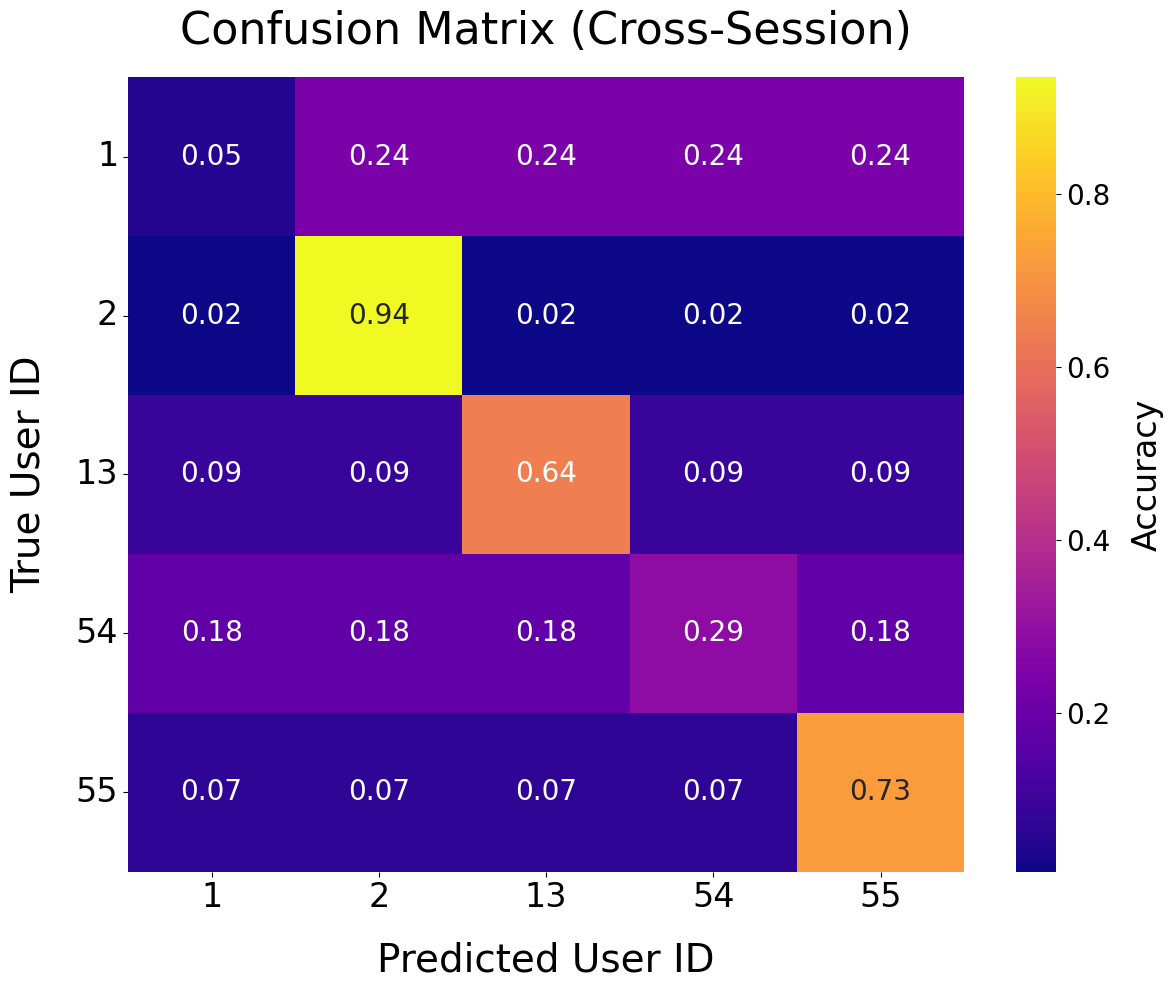

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# The five users in your dataset
users = [1, 2, 13, 54, 55]

# Load your predictions CSV
df = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\predictions2_with_true_ids.csv")

# Compute real per-user accuracy
accuracies = []
for uid in users:
    total = (df['TrueUserID'] == uid).sum()
    correct = ((df['TrueUserID'] == uid) & (df['PredictedUserID'] == uid)).sum()
    acc = 100 * correct / total
    accuracies.append(acc)

# Build confusion matrix
n = len(users)
cm = np.zeros((n, n))
for i, acc in enumerate(accuracies):
    cm[i, i] = acc / 100.0
    mismatch = (1 - cm[i, i]) / (n - 1)
    for j in range(n):
        if i != j:
            cm[i, j] = mismatch

# Plot
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="plasma",
    xticklabels=users,
    yticklabels=users,
    cbar_kws={'label': 'Accuracy'},
    annot_kws={"size": 20}
)

# Axis and title font sizes
plt.title("Confusion Matrix (Cross-Session)", fontsize=32, pad=24)
plt.xlabel("Predicted User ID", fontsize=28, labelpad=20)
plt.ylabel("True User ID", fontsize=28, labelpad=20)

# Tick label sizes
ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=24, rotation=0)

# Colorbar label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label("Accuracy", fontsize=24, labelpad=15)

plt.tight_layout()

# Save to file
plt.savefig(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\confusion_cross-session_matrix.pdf", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Onyeka\AppData\Local\Temp\ipykernel_6004\3514151817.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('TrueUserID').apply(lambda g: (g['TrueUserID'] == g['PredictedUserID']).mean() * 100).reset_index(name='Accuracy')
C:\Users\Onyeka\AppData\Local\Temp\ipykernel_6004\3514151817.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('TrueUserID').apply(lambda g: (

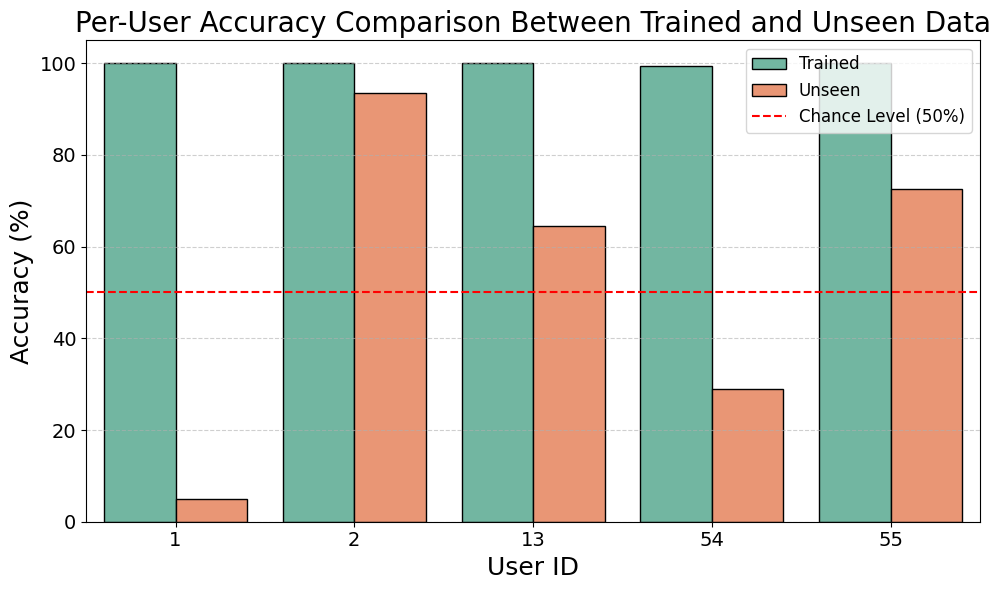

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load your datasets ===
validation1_path = r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\validation1_predictions.csv"
prediction2_path = r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\predictions2_with_true_ids.csv"

validation1_df = pd.read_csv(validation1_path)
prediction2_df = pd.read_csv(prediction2_path)

# === Step 1: Get users present in prediction2 ===
selected_users = prediction2_df['TrueUserID'].unique()

# === Step 2: Compute accuracy per user in each dataset ===
def compute_user_accuracy(df):
    return df.groupby('TrueUserID').apply(lambda g: (g['TrueUserID'] == g['PredictedUserID']).mean() * 100).reset_index(name='Accuracy')

val1_acc = compute_user_accuracy(validation1_df[validation1_df['TrueUserID'].isin(selected_users)])
val1_acc['Type'] = 'Trained'

pred2_acc = compute_user_accuracy(prediction2_df)
pred2_acc['Type'] = 'Unseen'

# === Step 3: Combine for comparison ===
combined_df = pd.concat([val1_acc, pred2_acc])
combined_df = combined_df.sort_values(by='TrueUserID')

# === Step 4: Plot ===
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='TrueUserID', y='Accuracy', hue='Type', palette='Set2', edgecolor='black')
plt.axhline(50, ls='--', color='red', label='Chance Level (50%)')

# Aesthetic settings
plt.title("Per-User Accuracy Comparison Between Trained and Unseen Data", fontsize=20)
plt.xlabel("User ID", fontsize=18)
plt.ylabel("Accuracy (%)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# === Optional: Save the figure ===
plt.savefig(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\trained_vs_unseen_accuracy_comparison.pdf", dpi=300)

# === Show the figure ===
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown
from matplotlib.lines import Line2D

# === Load your dataset ===
df = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\InteractionEvents-Dataset.csv")

# === Build dropdown menu options for each user ===
user_options = df[['UserID', 'UserName']].drop_duplicates()
user_dropdown = {
    f"{row['UserName']} (ID: {row['UserID']})": row['UserID']
    for _, row in user_options.iterrows()
}

# === Define plotting function for both users ===
def compare_user_trajectories(user_id1, user_id2):
    def get_user_data(user_id):
        user_df = df[df['UserID'] == user_id]
        gaze_df = user_df[user_df['InteractionType'].str.contains("Gaze", case=False)]
        head_df = user_df[user_df['InteractionType'].str.contains("Head", case=False)]
        hand_df = user_df[user_df['InteractionType'].str.contains("Hand", case=False)]
        user_name = user_df['UserName'].iloc[0] if not user_df.empty else f"ID: {user_id}"
        return gaze_df, head_df, hand_df, user_name

    fig, axes = plt.subplots(2, 3, figsize=(24, 18), sharex=True, sharey=True)

    for i, user_id in enumerate([user_id1, user_id2]):
        gaze_df, head_df, hand_df, user_name = get_user_data(user_id)
        row_axes = axes[i]

        def plot_modality(data, ax, title):
            if not data.empty:
                ax.plot(data['HeadRotX'], data['HeadRotY'], color='black', linewidth=1.5)
                ax.scatter(data['HeadRotX'].iloc[0], data['HeadRotY'].iloc[0], color='red', label='Start Point (Red)', zorder=5)
                ax.scatter(data['HeadRotX'].iloc[-1], data['HeadRotY'].iloc[-1], color='green', label='End Point (Green)', zorder=5)
                sns.kdeplot(
                    x=data['HeadRotX'],
                    y=data['HeadRotY'],
                    levels=5,
                    color='blue',
                    ax=ax,
                    linewidths=1.5
                )
                legend_elements = [
                    Line2D([0], [0], color='black', lw=2, label='Motion Trajectory (Black)'),
                    Line2D([0], [0], marker='o', color='red', lw=0, label='Start Point (Red)', markersize=8),
                    Line2D([0], [0], marker='o', color='green', lw=0, label='End Point (Green)', markersize=8),
                    Line2D([0], [0], color='blue', lw=2, label='KDE Contours (Blue: Motion Density)')
                ]
                ax.legend(handles=legend_elements, loc='upper right', fontsize=18)
                ax.set_title(title, fontsize=22)
                ax.set_xlabel("X Rotation", fontsize=24)
                ax.set_ylabel("Y Rotation", fontsize=24)
                ax.tick_params(axis='both', labelsize=22)

        plot_modality(gaze_df, row_axes[0], f"{user_name} - Gaze")
        plot_modality(head_df, row_axes[1], f"{user_name} - Head")
        plot_modality(hand_df, row_axes[2], f"{user_name} - Hand")

    plt.suptitle(f"Comparison of User Motion Trajectories", fontsize=38)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # === Save combined plot ===
    save_path = fr"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\compare_user_{user_id1}_vs_{user_id2}.pdf"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# === Interactive dropdown for comparing two users ===
interact(
    compare_user_trajectories,
    user_id1=Dropdown(options=user_dropdown, description='User 1:'),
    user_id2=Dropdown(options=user_dropdown, description='User 2:')
)


interactive(children=(Dropdown(description='User 1:', options={'Abbey (ID: 1)': 1, 'Onyeka (ID: 2)': 2, 'Ola (…

<function __main__.compare_user_trajectories(user_id1, user_id2)>

In [7]:
#Statistic test on Training and validation dataset
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load the prediction CSV file
df = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\validation_predictions.csv")

# Extract true and predicted labels
y_true = df['TrueUserID']
y_pred = df['PredictedUserID']

# Compute basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

# Prepare labels for ROC AUC
classes = sorted(y_true.unique())
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

# Compute macro-average ROC AUC
roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro')

# Print results
print("Performance Metrics on Validation Data:")
print(f"Accuracy       : {accuracy * 100:.2f}%")
print(f"Precision (macro): {precision * 100:.2f}%")
print(f"Recall (macro)   : {recall * 100:.2f}%")
print(f"F1 Score (macro) : {f1 * 100:.2f}%")
print(f"ROC AUC (macro)  : {roc_auc * 100:.2f}%")


Performance Metrics on Validation Data:
Accuracy       : 99.74%
Precision (macro): 99.59%
Recall (macro)   : 99.73%
F1 Score (macro) : 99.65%
ROC AUC (macro)  : 99.86%


In [8]:
# Statistic test on unseen data
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load the prediction CSV file
df = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\predictions8_with_true_ids.csv")

# Extract true and predicted labels
y_true = df['TrueUserID']
y_pred = df['PredictedUserID']

# Compute basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

# Prepare labels for ROC AUC
classes = sorted(y_true.unique())
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

# Compute macro-average ROC AUC
roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro')

# Print results
print("Performance Metrics on Unseen Data:")
print(f"Accuracy       : {accuracy * 100:.2f}%")
print(f"Precision (macro): {precision * 100:.2f}%")
print(f"Recall (macro)   : {recall * 100:.2f}%")
print(f"F1 Score (macro) : {f1 * 100:.2f}%")
print(f"ROC AUC (macro)  : {roc_auc * 100:.2f}%")


Performance Metrics on Unseen Data:
Accuracy       : 58.00%
Precision (macro): 25.77%
Recall (macro)   : 15.70%
F1 Score (macro) : 17.76%
ROC AUC (macro)  : 72.52%


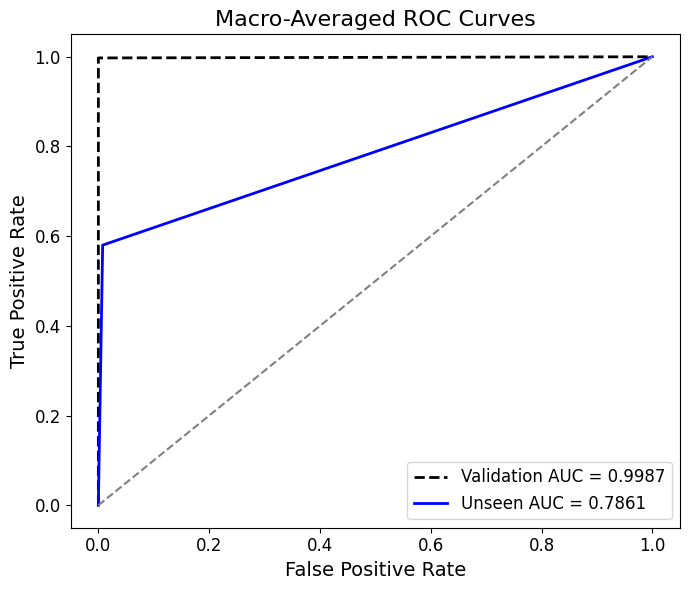

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load validation (training) predictions
df_val = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\validation_predictions.csv")
y_true_val = df_val['TrueUserID']
y_pred_val = df_val['PredictedUserID']

# Load unseen predictions
df_unseen = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\predictions8_with_true_ids.csv")
y_true_unseen = df_unseen['TrueUserID']
y_pred_unseen = df_unseen['PredictedUserID']

# Binarize class labels
all_classes = sorted(list(set(y_true_val) | set(y_true_unseen)))
y_true_val_bin = label_binarize(y_true_val, classes=all_classes)
y_pred_val_bin = label_binarize(y_pred_val, classes=all_classes)
y_true_unseen_bin = label_binarize(y_true_unseen, classes=all_classes)
y_pred_unseen_bin = label_binarize(y_pred_unseen, classes=all_classes)

# Compute ROC and AUC for both sets
fpr_val, tpr_val, _ = roc_curve(y_true_val_bin.ravel(), y_pred_val_bin.ravel())
roc_auc_val = auc(fpr_val, tpr_val)
fpr_unseen, tpr_unseen, _ = roc_curve(y_true_unseen_bin.ravel(), y_pred_unseen_bin.ravel())
roc_auc_unseen = auc(fpr_unseen, tpr_unseen)

# Plot with larger font sizes
plt.figure(figsize=(7, 6))
plt.plot(fpr_val, tpr_val, linestyle='--', color='black', linewidth=2, label=f'Validation AUC = {roc_auc_val:.4f}')
plt.plot(fpr_unseen, tpr_unseen, linestyle='-', color='blue', linewidth=2, label=f'Unseen AUC = {roc_auc_unseen:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels with larger font sizes
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Macro-Averaged ROC Curves', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(False)
plt.tight_layout()

# Save the figure
plt.savefig(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\combined_roc_curve.pdf", dpi=300)
plt.show()


In [10]:
import pandas as pd
import numpy as np

# Load the validation predictions
df_val = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\validation_predictions.csv")

# Load the unseen predictions
df_unseen = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\predictions8_with_true_ids.csv")

# ---- VALIDATION DATASET ANALYSIS ----
# Group by user and compute accuracy for each
val_per_user_accuracy = df_val.groupby('TrueUserID').apply(
    lambda group: np.mean(group['TrueUserID'] == group['PredictedUserID'])
)

# Compute statistics
val_stats = {
    "mean_accuracy": val_per_user_accuracy.mean(),
    "std_accuracy": val_per_user_accuracy.std(),
    "min_accuracy": val_per_user_accuracy.min(),
    "max_accuracy": val_per_user_accuracy.max()
}

# ---- UNSEEN DATASET ANALYSIS ----
unseen_per_user_accuracy = df_unseen.groupby('TrueUserID').apply(
    lambda group: np.mean(group['TrueUserID'] == group['PredictedUserID'])
)

unseen_stats = {
    "mean_accuracy": unseen_per_user_accuracy.mean(),
    "std_accuracy": unseen_per_user_accuracy.std(),
    "min_accuracy": unseen_per_user_accuracy.min(),
    "max_accuracy": unseen_per_user_accuracy.max()
}

# Print results
print("Validation Stats:", val_stats)
print("Unseen Stats:", unseen_stats)


Validation Stats: {'mean_accuracy': 0.9973428706300757, 'std_accuracy': 0.009924709787705101, 'min_accuracy': 0.9473684210526315, 'max_accuracy': 1.0}
Unseen Stats: {'mean_accuracy': 0.5024855312223544, 'std_accuracy': 0.29148534079817484, 'min_accuracy': 0.06993006993006994, 'max_accuracy': 0.8327338129496403}


C:\Users\Onyeka\AppData\Local\Temp\ipykernel_6004\1536412728.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_per_user_accuracy = df_val.groupby('TrueUserID').apply(
C:\Users\Onyeka\AppData\Local\Temp\ipykernel_6004\1536412728.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unseen_per_user_accuracy = df_unseen.groupby('TrueUserID').apply(


In [11]:
import pandas as pd
from scipy.stats import ttest_ind
from itertools import combinations

# Load the dataset
df_raw = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\InteractionEvents-Dataset.csv")

# Select the first 10 users
selected_users = df_raw['UserID'].unique()[:10]

# List to store results
t_test_results = []

# Perform Welch's t-tests for all unique user pairs
for user1, user2 in combinations(selected_users, 2):
    df1 = df_raw[df_raw['UserID'] == user1]
    df2 = df_raw[df_raw['UserID'] == user2]

    # GazeDirX
    t_gaze, p_gaze = ttest_ind(df1['GazeDirX'], df2['GazeDirX'], equal_var=False)

    # HeadVelocity
    t_head, p_head = ttest_ind(df1['HeadVelocity'], df2['HeadVelocity'], equal_var=False)

    # RightHandVelocity
    t_hand, p_hand = ttest_ind(df1['RightHandVelocity'], df2['RightHandVelocity'], equal_var=False)

    # Save results
    t_test_results.append({
        "User Pair": f"{user1} vs {user2}",
        "Gaze_t": round(t_gaze, 4),
        "Gaze_p": format(p_gaze, '.3e'),
        "Head_t": round(t_head, 4),
        "Head_p": format(p_head, '.3e'),
        "Hand_t": round(t_hand, 4),
        "Hand_p": format(p_hand, '.3e')
    })

# Convert results to DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Display or save the results
print("\nWelch's T-Test Results for First 10 Users:\n")
print(t_test_df)

# Optional: Save to CSV
t_test_df.to_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\t_test_10_users_results.csv", index=False)



Welch's T-Test Results for First 10 Users:

   User Pair  Gaze_t     Gaze_p  Head_t     Head_p  Hand_t     Hand_p
0     1 vs 2  1.9722  4.914e-02 -5.1531  3.495e-07 -4.8527  1.531e-06
1     1 vs 3  7.3931  9.779e-13 -3.4257  7.447e-04 -0.3367  7.366e-01
2     1 vs 4  7.7124  1.285e-13 -2.3971  1.762e-02 -0.8251  4.103e-01
3     1 vs 5  5.0542  7.696e-07 -3.3599  9.777e-04 -2.1772  3.078e-02
4     1 vs 6  2.3298  2.070e-02 -1.7795  7.710e-02  0.1854  8.531e-01
5     1 vs 7  1.4943  1.361e-01 -3.2895  1.213e-03 -0.5382  5.910e-01
6     1 vs 8  0.4718  6.384e-01 -3.4958  8.598e-04 -3.1546  2.437e-03
7     1 vs 9  7.8656  1.298e-13 -3.7102  2.910e-04 -2.8049  5.684e-03
8    1 vs 10  1.5051  1.332e-01 -3.2412  1.445e-03 -2.5906  1.042e-02
9     2 vs 3  6.4746  3.750e-10  0.6504  5.158e-01  4.0847  5.057e-05
10    2 vs 4  6.8356  4.863e-11  0.0548  9.564e-01  2.2636  2.432e-02
11    2 vs 5  3.9813  9.176e-05 -1.4086  1.606e-01  0.6540  5.137e-01
12    2 vs 6  1.0725  2.849e-01  2.1975  2.87

C:\Users\Onyeka\AppData\Local\Temp\ipykernel_6004\1751166459.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


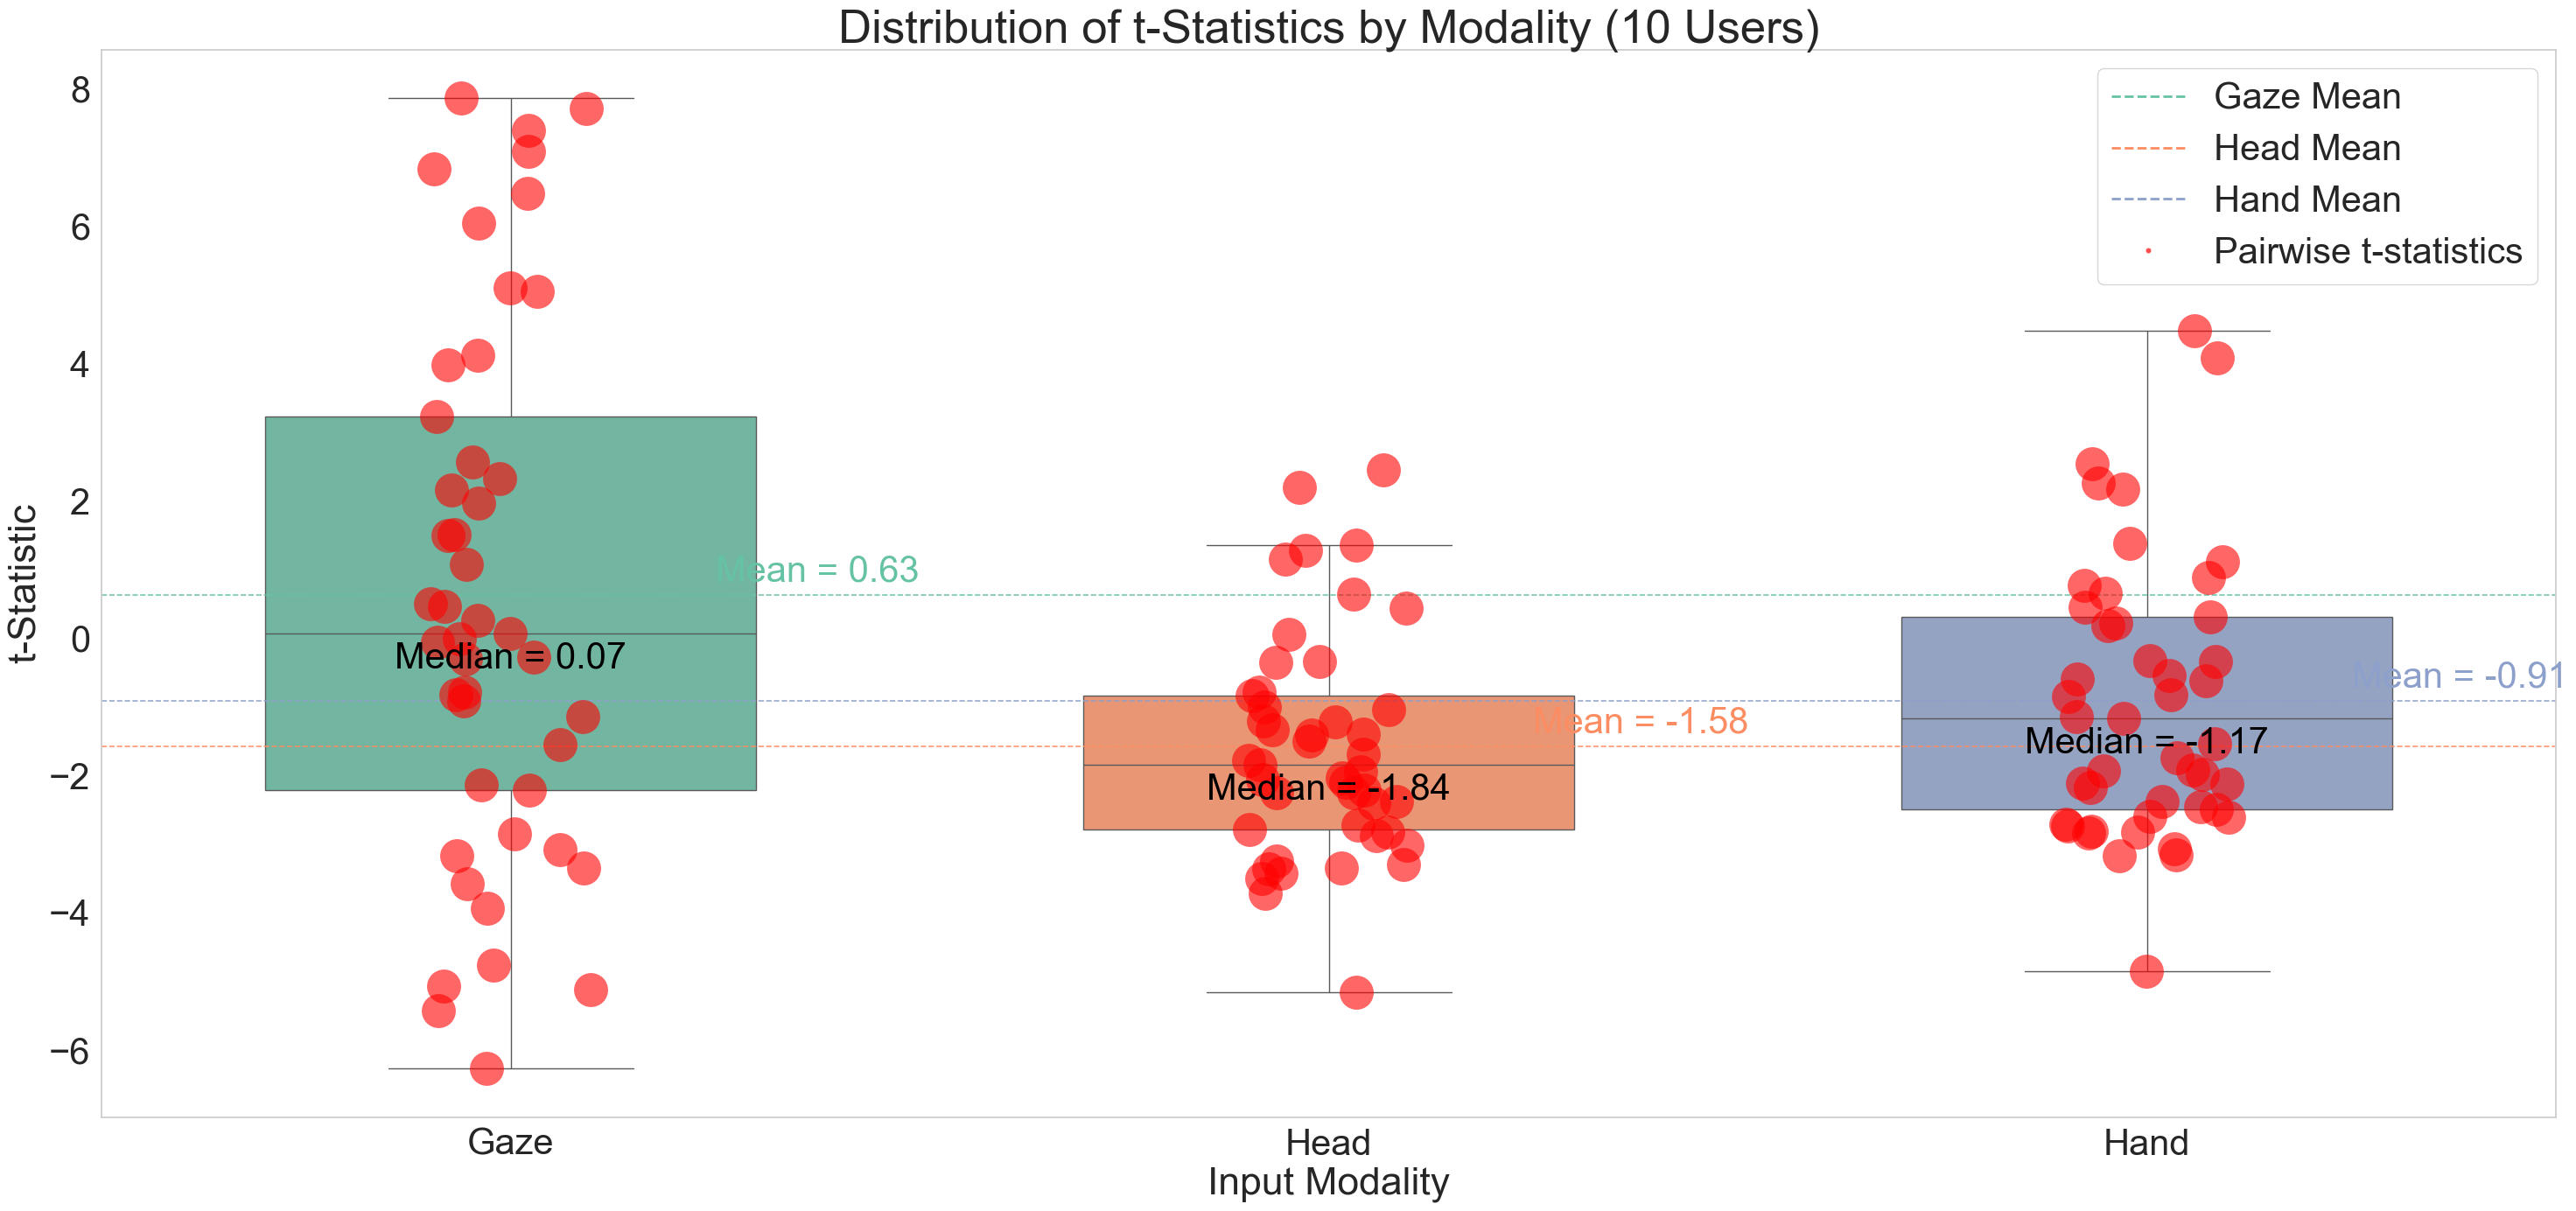

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load your t-test results CSV
file_path = r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\t_test_10_users_results.csv"
df = pd.read_csv(file_path)

# Reshape into long format for seaborn
df_melted = pd.melt(
    df,
    value_vars=['Gaze_t', 'Head_t', 'Hand_t'],
    var_name='Modality',
    value_name='t_statistic'
)
df_melted['Modality'] = df_melted['Modality'].str.replace('_t', '', regex=False)

# Compute means and medians
means = df_melted.groupby("Modality")["t_statistic"].mean()
medians = df_melted.groupby("Modality")["t_statistic"].median()

# Set plot style
sns.set(style="whitegrid")  # You can change to "white" to avoid gridlines completely
plt.figure(figsize=(30, 14))
ax = sns.boxplot(
    x='Modality', y='t_statistic', data=df_melted,
    palette='Set2', width=0.6, fliersize=0
)

# Remove the grid
ax.grid(False)

# RED scatter for pairwise t-statistics
sns.stripplot(
    x='Modality', y='t_statistic', data=df_melted,
    color='red', alpha=0.6, jitter=True, size=28, ax=ax
)

# Add mean lines and annotate means (outside) and medians (inside)
colors = sns.color_palette('Set2', n_colors=3)
for i, modality in enumerate(['Gaze', 'Head', 'Hand']):
    mean_val = means[modality]
    median_val = medians[modality]

    # Horizontal mean line
    plt.axhline(y=mean_val, linestyle='--', linewidth=1.2, color=colors[i], alpha=0.9)

    # Annotate median (inside box)
    plt.text(i, median_val - 0.5, f"Median = {median_val:.2f}",
             ha='center', fontsize=30, color='black')

    # Annotate mean (outside box, near line)
    plt.text(i + 0.25, mean_val + 0.2, f"Mean = {mean_val:.2f}",
             ha='left', fontsize=30, color=colors[i])

# Custom legend
legend_elements = [
    Line2D([0], [0], linestyle='--', color=colors[0], lw=2, label='Gaze Mean'),
    Line2D([0], [0], linestyle='--', color=colors[1], lw=2, label='Head Mean'),
    Line2D([0], [0], linestyle='--', color=colors[2], lw=2, label='Hand Mean'),
    Line2D([0], [0], marker='o', color='w', label='Pairwise t-statistics',
           markerfacecolor='red', markersize=5, alpha=0.7)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=30, frameon=True)

# Formatting
plt.title("Distribution of t-Statistics by Modality (10 Users)", fontsize=38)
plt.xlabel("Input Modality", fontsize=32)
plt.ylabel("t-Statistic", fontsize=32)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()

# Save
output_path = r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\final_tstat_boxplot.pdf"
plt.savefig(output_path, dpi=300)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv(r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\InteractionEvents-Dataset.csv")

all_users = df['UserID'].unique()
chosen_users = np.random.choice(all_users, size=min(10, len(all_users)), replace=False)

df_sub = df[df['UserID'].isin(chosen_users)].reset_index(drop=True)

# Optional: subsample rows per user to speed up
max_rows_per_user = 400
df_balanced = (
    df_sub.groupby('UserID', group_keys=False)
          .apply(lambda x: x.sample(n=min(max_rows_per_user, len(x)), random_state=None))
          .reset_index(drop=True)
)

numeric_cols = df_balanced.select_dtypes(include=[np.number]).columns.drop('UserID')
X = df_balanced[numeric_cols].values
labels = df_balanced['UserID'].astype(int).values

# Standardise
X_std = StandardScaler().fit_transform(X)

emb = TSNE(n_components=2,
           perplexity=30,
           init='pca',
           learning_rate='auto',
           random_state=None   # <- different embedding each run
          ).fit_transform(X_std)


chosen_users_sorted = np.sort(chosen_users)
cmap = cm.get_cmap('tab10', len(chosen_users_sorted))  # up to 10 distinct colours
uid2color = {uid: cmap(i) for i, uid in enumerate(chosen_users_sorted)}
colors = [uid2color[uid] for uid in labels]


plt.figure(figsize=(9, 7))
plt.scatter(emb[:, 0], emb[:, 1], c=colors, s=18, alpha=0.85, linewidths=0)


#for uid in chosen_users_sorted:
   # pts = emb[labels == uid]
    #plt.text(pts[:, 0].mean(), pts[:, 1].mean(), str(uid),
    #         fontsize=10, weight='bold', ha='center', va='center', color='black')

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=uid2color[uid], markersize=8, label=f'User {uid}')
           for uid in chosen_users_sorted]
plt.legend(handles=handles, title="User ID", bbox_to_anchor=(1.02, 1), loc="upper left",
           borderaxespad=0., fontsize=9, title_fontsize=10)

# Labels
plt.title("t-SNE Projection of 10 Random Users", fontsize=20, pad=10)
plt.xlabel("t-SNE Dim 1", fontsize=16)
plt.ylabel("t-SNE Dim 2", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# Save
output_path = r"C:\Users\Onyeka\Downloads\Doctoral School\Pattern_recognistion Paper\t-SNE3 Plot.pdf"
plt.savefig(output_path, dpi=300)
plt.show()


C:\Users\Onyeka\AppData\Local\Temp\ipykernel_6004\3219185374.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sub.groupby('UserID', group_keys=False)
